**Step-1**

Importing necessary python libraries


In [1]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat

**Step-2**
Downloading the entire contents of the "CIFAR-10-images" repository from GitHub and storing it in the current working directory.

In [2]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 20.34 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


**Step-3**
String the dataset in the current workspace and loading the class names in CATEGORIES list. And printing the class names.

In [3]:
MYTRAIN_DIR = '/content/CIFAR-10-images/test'
CATEGORIES = []
for c in os.listdir(MYTRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['automobile', 'horse', 'deer', 'cat', 'truck', 'ship', 'bird', 'dog', 'airplane', 'frog']


**Step-4**

Reading every images from each class folder and record them under the TRAIN_DATA after converting them into grayscale images. Showing output of a converted image.

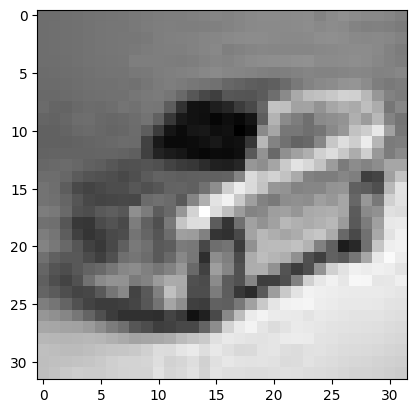

In [4]:
TRAIN_DATA=[]

for label in CATEGORIES:
  class_dir = os.path.join(MYTRAIN_DIR, label)
  images = os.listdir(class_dir)
  Index = CATEGORIES.index(label)

  for img in images:
    TRAIN_DATA.append([Index, cv.imread(os.path.join(class_dir, img), cv.IMREAD_GRAYSCALE)])

plt.imshow(TRAIN_DATA[100][1], cmap="gray")


**Step-5**

Randomly shuffling the TRAIN_DATA. Definig K-values ranging from 1 to 20. Also defining function to calculate the manhattan(L1) distance and euclidian(L2) distance for K-nn model

In [5]:
import random
from collections import Counter
random.shuffle(TRAIN_DATA)
k=20

def manhattan_dist(x,y):
  return np.sum(np.abs(x-y))

def euclidian_dist(x,y):
  return np.sqrt(np.sum((x-y)**2))

**Step-6**

Here the datasets are devided into 5 folds. Each folds contains 2000 images. The training of K-nn model also has been done and the accuracy of manhattan(L1) distance and euclidian(L2) distance also been calculated. While training progress of each fold has been shown here.



In [6]:

manhattan_per = []
euclidian_per = []

a=0
b=2000
while(b<10001):
  fold_array=TRAIN_DATA[a:b]
  train_array=TRAIN_DATA[:a]+TRAIN_DATA[b:]
  fold_total_img = 2000
  fold_correct_img_man = [0]*k
  fold_correct_img_ecd = [0]*k

  for fold_unit in tqdm(fold_array, desc="Processing folds-------"):
    fold_class, fold_img = fold_unit
    fold_man_unit_list=[]
    fold_ecd_unit_list=[]

    for train_unit in train_array:
      train_class, train_img = train_unit
      fold_man_unit_list.append([train_class, manhattan_dist(fold_img, train_img)])
      fold_ecd_unit_list.append([train_class, euclidian_dist(fold_img, train_img)])
    fold_man_unit_list.sort(key=lambda r: r[1])
    fold_ecd_unit_list.sort(key=lambda r: r[1])
    fold_man = [i[0] for i in fold_man_unit_list[:k]]
    fold_ecd = [i[0] for i in fold_ecd_unit_list[:k]]
    high_man=[]
    high_ecd=[]

    while fold_man:
      counter = Counter(fold_man)
      most_common_number, most_common_count = counter.most_common(1)[0]
      high_man.insert(0, most_common_number)
      fold_man.pop()
    while fold_ecd:
      counter = Counter(fold_ecd)
      most_common_number, most_common_count = counter.most_common(1)[0]
      high_ecd.insert(0, most_common_number)
      fold_ecd.pop()

    for i in range(20):
      if(high_man[i]==fold_class):
        fold_correct_img_man[i]+=1
      if(high_ecd[i]==fold_class):
        fold_correct_img_ecd[i]+=1
  fold_correct_img_man = [(j/fold_total_img)*100 for j in fold_correct_img_man]
  fold_correct_img_ecd = [(j/fold_total_img)*100 for j in fold_correct_img_ecd]
  manhattan_per.append(fold_correct_img_man)
  euclidian_per.append(fold_correct_img_ecd)
  a+=2000
  b+=2000


Processing folds-------: 100%|██████████| 2000/2000 [06:39<00:00,  5.00it/s]


In [7]:
man_fold_acc = []
ecd_fold_acc = []
for i in range(20):
    extracted_man = [sublist[i] for sublist in manhattan_per]
    extracted_ecd = [sublist[i] for sublist in euclidian_per]
    man_fold_acc.append(extracted_man)
    ecd_fold_acc.append(extracted_ecd)

**Step-7**

Calculating mean and standard manhattan(L1) distance and euclidian(L2) distance accuracy and storing them


In [8]:
mean_manhattan = [np.mean(i) for i in man_fold_acc]
mean_euclidian = [np.mean(i) for i in ecd_fold_acc]

std_manhattan = [np.std(i) for i in man_fold_acc]
std_euclidian = [np.std(i) for i in ecd_fold_acc]

**Step-8**

The result achieved in previous steps are stored in list. In this step, the accuracy vs. k-value plot for both manhattan(L1) distance and euclidian(L2) distance has been plotted. From the information achieved from plotting, we will be able to see which k-values are performing better for which distance metric.

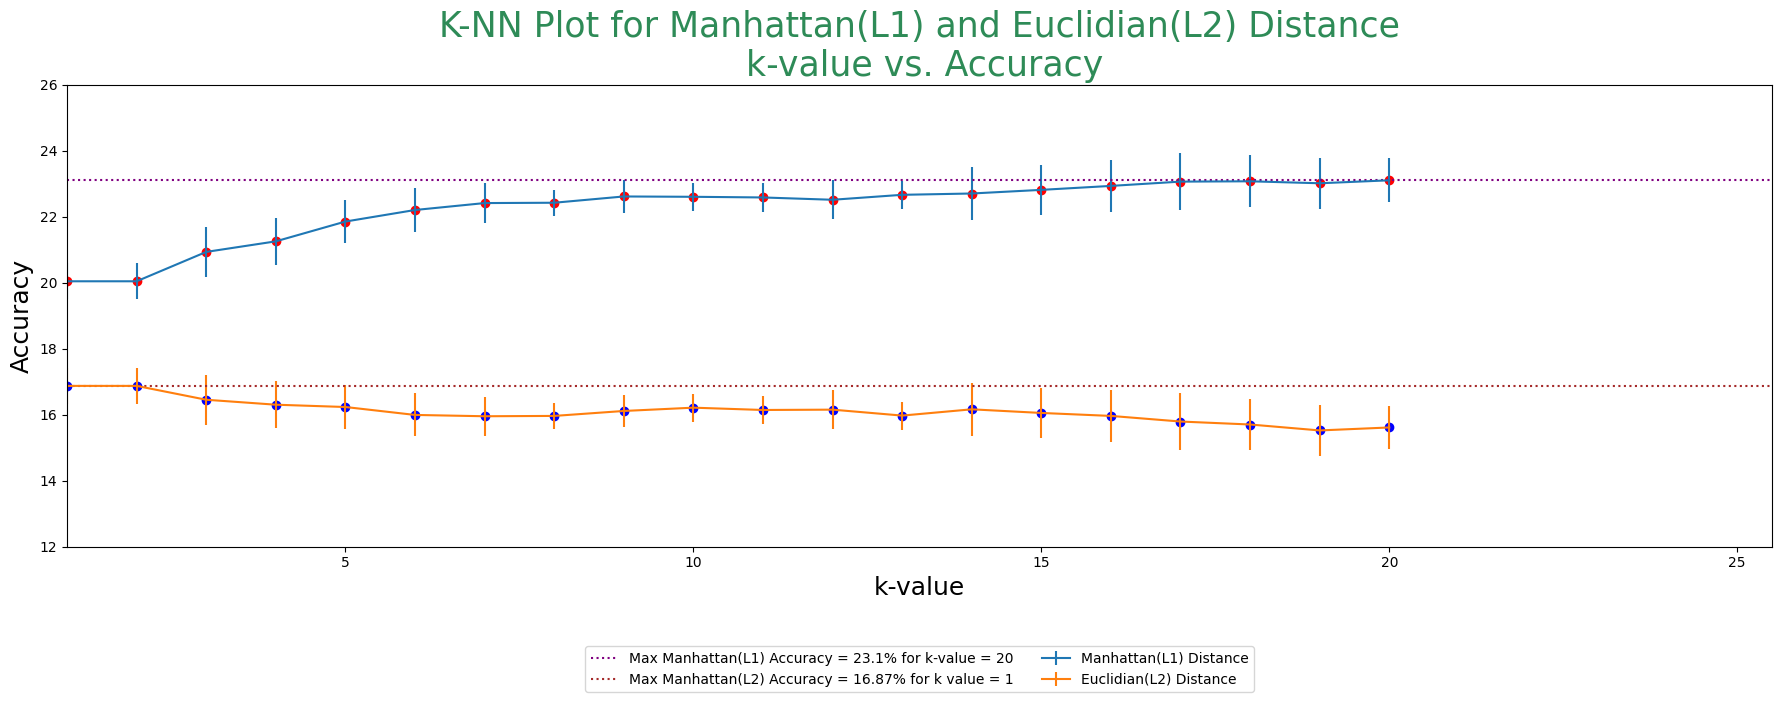

In [9]:
k=20
plt.figure(figsize=(22, 6))
plt.errorbar(range(1, k+1), mean_manhattan, yerr=std_euclidian, label="Manhattan(L1) Distance")
plt.errorbar(range(1, k+1), mean_euclidian, yerr=std_euclidian, label="Euclidian(L2) Distance")
plt.scatter(range(1, k+1), mean_manhattan, color="red", marker="o")
plt.scatter(range(1, k+1), mean_euclidian, color="blue", marker="o")
plt.xlabel("k-value", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("K-NN Plot for Manhattan(L1) and Euclidian(L2) Distance\n k-value vs. Accuracy", size=25, color="seagreen")
plt.xlim(1, 25.5)
plt.ylim(12, 26)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
max_acc_man = np.argmax(mean_manhattan)
max_acc_ecd = np.argmax(mean_euclidian)
plt.axhline(y=mean_manhattan[max_acc_man], linestyle='dotted', color='purple', label=f'Max Manhattan(L1) Accuracy = {round(mean_manhattan[max_acc_man],2)}% for k-value = {max_acc_man+1}')
plt.axhline(y=mean_euclidian[max_acc_ecd], linestyle='dotted', color='brown', label=f'Max Manhattan(L2) Accuracy = {round(mean_euclidian[max_acc_ecd],2)}% for k value = {max_acc_ecd+1}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

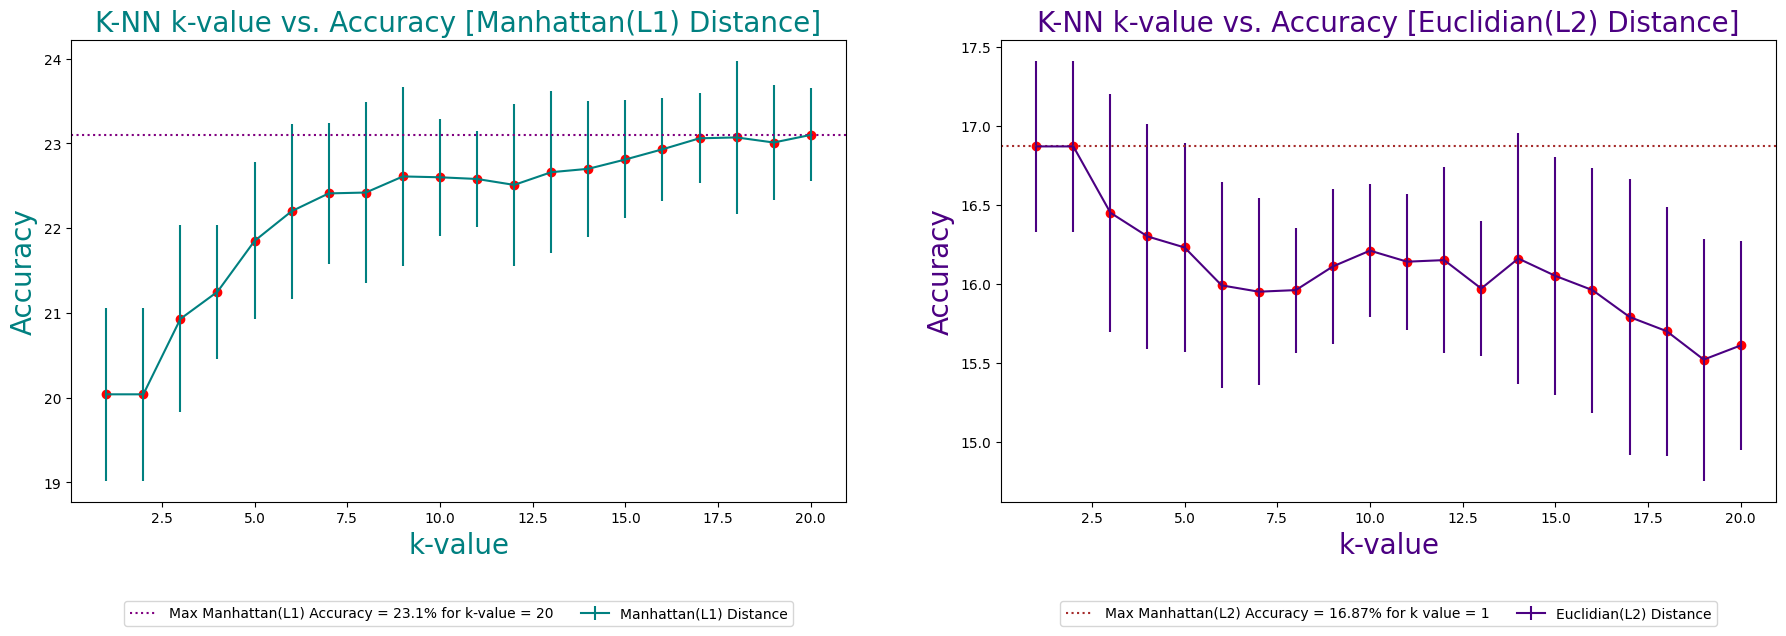

In [10]:
fig, (p1, p2) = plt.subplots(1, 2, figsize=(22, 6))
p1.errorbar(range(1, k+1), mean_manhattan, yerr=std_manhattan, label="Manhattan(L1) Distance", color="teal")
p1.scatter(range(1, k+1), mean_manhattan, color="red", marker="o")
p1.set_xlabel("k-value", size=20, color="teal")
p1.set_ylabel("Accuracy", size=20, color="teal")
p1.set_title("K-NN k-value vs. Accuracy [Manhattan(L1) Distance]", size=20, color="teal")
p1.axhline(y=mean_manhattan[max_acc_man], linestyle='dotted', color='purple', label=f'Max Manhattan(L1) Accuracy = {round(mean_manhattan[max_acc_man],2)}% for k-value = {max_acc_man+1}')
p1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
p2.errorbar(range(1, k+1), mean_euclidian, yerr=std_euclidian, label="Euclidian(L2) Distance", color="indigo")
p2.scatter(range(1, k+1), mean_euclidian, color="red", marker="o")
p2.set_xlabel("k-value", size=20, color="indigo")
p2.set_ylabel("Accuracy", size=20, color="indigo")
p2.set_title("K-NN k-value vs. Accuracy [Euclidian(L2) Distance]", size=20, color="indigo")
p2.axhline(y=mean_euclidian[max_acc_ecd], linestyle='dotted', color='brown', label=f'Max Manhattan(L2) Accuracy = {round(mean_euclidian[max_acc_ecd],2)}% for k value = {max_acc_ecd+1}')
p2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

**Step-9**

In the below codes the top 5 prediction for manhattan and euclidian distance has been done. Each prediction will contain the class name that the model predicted


In [11]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from collections import Counter

In [12]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git
MYTEST_DIR = '/content/CIFAR-10-images/test'
CATEGORIES = []
for c in os.listdir(MYTEST_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)
TEST_DATA=[]

for label in CATEGORIES:
  class_dir = os.path.join(MYTEST_DIR, label)
  images = os.listdir(class_dir)
  Index = CATEGORIES.index(label)

  for img in images:
    TEST_DATA.append([Index, cv.imread(os.path.join(class_dir, img), cv.IMREAD_GRAYSCALE)])

fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.
['automobile', 'horse', 'deer', 'cat', 'truck', 'ship', 'bird', 'dog', 'airplane', 'frog']


In [13]:
random.shuffle(TEST_DATA)
k_value = 25

def manhattan_dist(x,y):
  return np.sum(np.abs(x-y))

def euclidian_dist(x,y):
  return np.sqrt(np.sum((x-y)**2))

In [18]:
def display_top_5(predictions, test_data):
    for i, (true_class, predicted_class) in enumerate(predictions[:5]):
        true_class_name = CATEGORIES[true_class]
        predicted_class_name = CATEGORIES[predicted_class]
        image = test_data[i][1]

        plt.figure(figsize=(8, 4))
        plt.imshow(image, cmap="gray")
        plt.title(f"True Class: {true_class_name}, Predicted Class: {predicted_class_name}")
        plt.axis('off')
        plt.show()

Making Predictions: 100%|██████████| 10000/10000 [41:24<00:00,  4.03it/s]

predictions for Manhattan distance


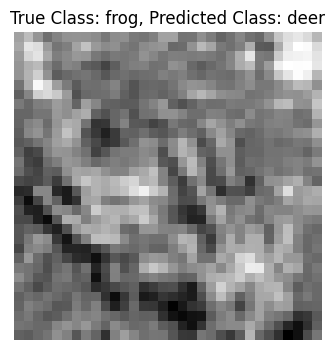

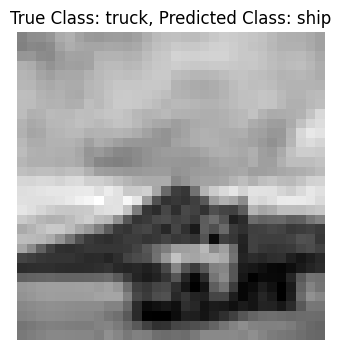

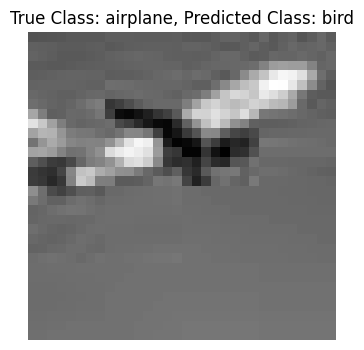

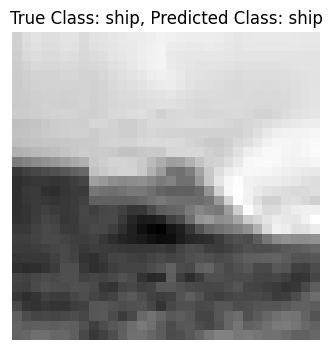

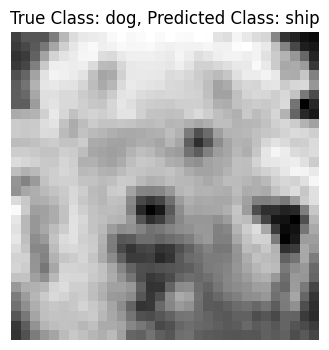

predictions for Euclidean distance


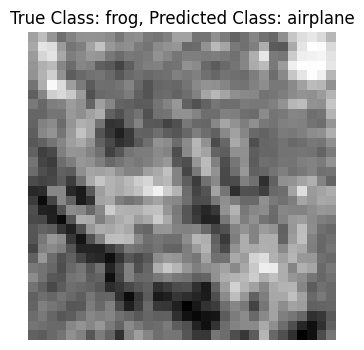

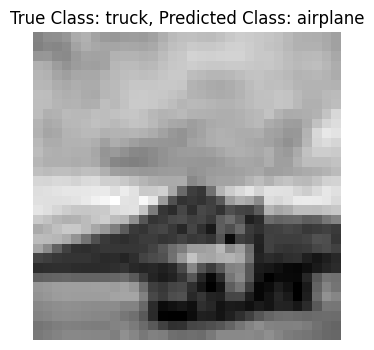

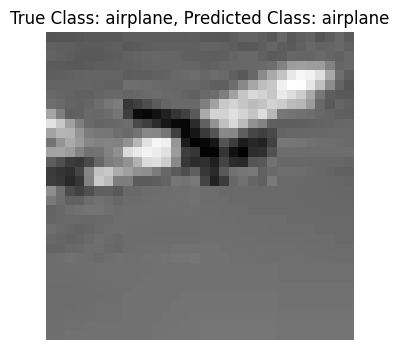

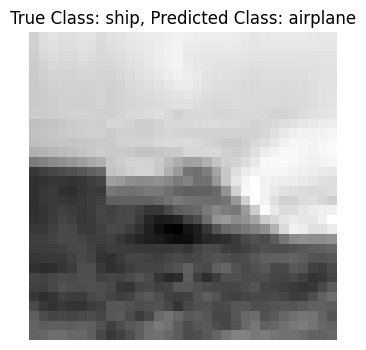

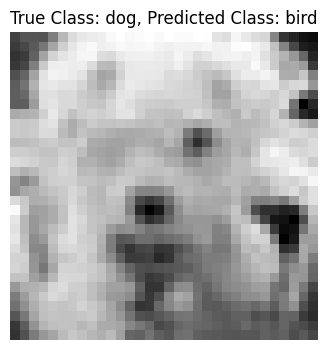

In [17]:

def make_predictions(test_data, k):
    predictions_manhattan = []
    predictions_euclidean = []

    for fold_unit in tqdm(test_data, desc="Making Predictions"):
        fold_class, fold_img = fold_unit


        distances_manhattan = []
        distances_euclidean = []
        for train_unit in TEST_DATA:
            train_class, train_img = train_unit
            distance_manhattan = manhattan_dist(fold_img, train_img)
            distance_euclidean = euclidian_dist(fold_img, train_img)
            distances_manhattan.append([train_class, distance_manhattan])
            distances_euclidean.append([train_class, distance_euclidean])


        distances_manhattan.sort(key=lambda r: r[1])
        distances_euclidean.sort(key=lambda r: r[1])
        top_k_manhattan = [i[0] for i in distances_manhattan[:k]]
        top_k_euclidean = [i[0] for i in distances_euclidean[:k]]


        counter_manhattan = Counter(top_k_manhattan)
        counter_euclidean = Counter(top_k_euclidean)
        predicted_class_manhattan = counter_manhattan.most_common(1)[0][0]
        predicted_class_euclidean = counter_euclidean.most_common(1)[0][0]
        predictions_manhattan.append((fold_class, predicted_class_manhattan))
        predictions_euclidean.append((fold_class, predicted_class_euclidean))

    return predictions_manhattan, predictions_euclidean


test_predictions_manhattan, test_predictions_euclidean = make_predictions(TEST_DATA, k_value)

# Display top 5 predictions for Manhattan distance
print("predictions for Manhattan distance")
display_top_5(test_predictions_manhattan, TEST_DATA)

# Display top 5 predictions for Euclidean distance
print("predictions for Euclidean distance")
display_top_5(test_predictions_euclidean, TEST_DATA)


**Discussion:**

In this Assignment, a comparison was made between the Manhattan (L1) and Euclidean (L2) distance metrics to determine their performance in measuring distances between images in a grayscale dataset. Here the 5 fold cross validation is used.

The effectiveness of these metrics was influenced by the nature of features and the complexity of the categories. The Manhattan distance, akin to counting blocks in a city, and the Euclidean distance, comparable to measuring a straight line, were examined. It was observed that, for the grayscale dataset where images are composed of varying shades of gray, the Manhattan distance metric demonstrated a slight advantage in distinguishing between images.

As the K-nn algorithm is used to train the dataset, the performance of K-nn algorithm depends on the datasets characteristics. Images, being multifaceted entities, vary in terms of complexity, intricacy of features, and susceptibility to noise. So, it is essential to note that the choice of distance metric is contingent on specific dataset attributes and problem contexts. Considerations such as the dimensionality of features and the presence of outliers bear significance in this regard. In instances where images exhibit relative simplicity and minimal noise, the Manhattan distance demonstrated efficacy. Conversely, when confronted with images characterized by diverse shades, textures, and nuanced details, the Euclidean distance emerged as the more judicious selection.

While the results are encouraging, there are avenues for further enhancement. Exploring alternative methods of image analysis and investigating other techniques for identifying the nearest neighbors could potentially yield improvements.

In conclusion, the comparative assessment of Manhattan (L1) and Euclidean (L2) distances underscores the significance of selecting an appropriate metric aligned with the dataset's characteristics. Although the Manhattan distance metric displayed a better performance in our grayscale dataset, there remains room for exploration to refine the accuracy of object recognition in images.